## 4 Numpy

In [2]:
import numpy as np
from PIL.ImageOps import grayscale
from scipy.linalg.cython_blas import stpmv
from sympy.codegen.fnodes import dimension
from torch import dtype

In [3]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [4]:
%timeit my_arr2 = my_arr*2

735 μs ± 52.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%timeit my_list2 = [x*2 for x in my_list]

25.8 ms ± 231 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [7]:
data * 3

array([[ 4.5, -0.3,  9. ],
       [ 0. , -9. , 19.5]])

In [8]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
np.zeros_like(data)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
 arr_2d = np.arange(9).reshape(3, 3)
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
arr_2d[:2]

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
arr_2d[1, :2]

array([3, 4])

In [15]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [16]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

### 生成伪随机数

In [18]:
samples = np.random.standard_normal(size=(8, 4))
samples

array([[ 0.02840174, -0.07399893, -0.89694953, -1.31541177],
       [-0.27226549,  0.94397853, -0.51180116,  0.2899688 ],
       [-0.15228127, -0.27408158, -0.91193769, -0.54047958],
       [-1.15872352,  0.86362598, -1.29077786, -1.00274871],
       [-0.55591821,  0.9311687 ,  0.80746543,  1.17804154],
       [ 1.38714698,  0.26330486,  0.18793192,  0.07337501],
       [ 1.10452863, -0.61311492,  0.10480896, -0.49382531],
       [ 0.23989628,  0.61478964,  0.71468508, -0.50446726]])

In [22]:
from random import normalvariate

N = 1_000_000

In [24]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

284 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit np.random.standard_normal(size=N)

14.9 ms ± 37.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
points = np.arange(-5, 5, 0.01)
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [27]:
points.shape

(1000,)

In [28]:
xs, ys = np.meshgrid(points, points)

In [29]:
xs.shape

(1000, 1000)

In [30]:
ys.shape

(1000, 1000)

In [31]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot')

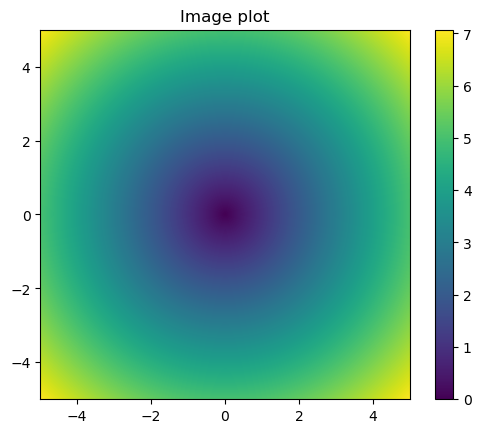

In [39]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=None, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot")

In [40]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [41]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

### 随机漫步

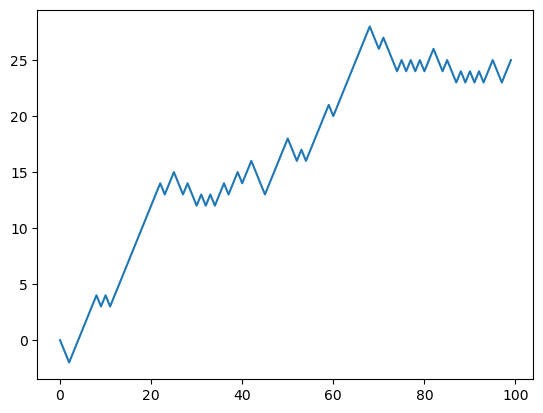

In [46]:
import random

position = 0
walk = [position]
nstep = 1000
for _ in range(nstep):
    step = 1 if random.randint(0, 1) else -1
    position = position + step
    walk.append(position)
plt.plot(walk[:100])

In [48]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [49]:
walk.min()

-8

In [50]:
walk.max()

50

In [51]:
(np.abs(walk)>=10).argmax()

155

In [1]:
import pandas as pd

In [ ]:
pd.concat()